### Load Image

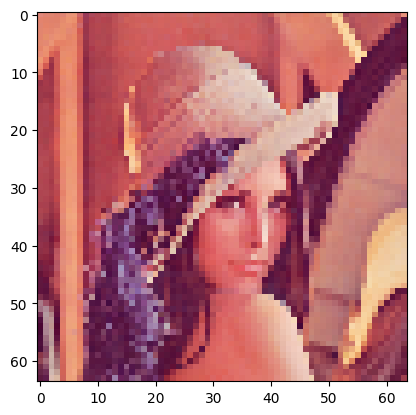

In [5]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('lena.png')
# Convert to rgb 
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Resize image to 12 x 12 
image = cv.resize(image, (64, 64))

plt.imshow(image)

In [50]:
class Cluster():
    def __init__(self, cluster_idx, node_idx):
        self.id = cluster_idx
        self.node_idx = node_idx
        self.nodes_idxs = [node_idx]
        self.rgb = image[node_idx[0], node_idx[1]]
            
    def add_node(self, node_idx, rgb):
        self.nodes.append(node_idx)
        self.__update_rgb()
    
    def __update_rgb(self):
        # Update rgb value of cluster
        rgb = np.zeros((3, 1))
        for node in self.nodes:
            rgb += node.rgb
        self.rgb = rgb / len(self.nodes)

In [51]:
# Define affinity (simiarity) of 2 pixels
def affinity(pixel1, pixel2, sigma=100):
    dist = np.linalg.norm(pixel1 - pixel2)
    return np.exp((-dist**2) / (2 * sigma ** 2))

# Test affinity function
pixel1 = np.array([170, 170, 170])
pixel2 = np.array([255, 255, 255])
print(affinity(pixel1, pixel2))

0.3383244272228801


In [53]:
import networkx as nx 

G = nx.Graph()

cluser_idx = 0
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        
        pixel_idx = (i, j)

        cluster = Cluster(cluser_idx, pixel_idx)
        
        G.add_node(
            (i,j), 
            rgb=image[i, j], 
            cluster=cluster
        )
        
        cluser_idx += 1 

print('Number of clusters: ', len(G.nodes()))

Number of clusters:  4096


In [54]:
k = 1

edges = set()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):

        # Add all pixels within a k x k window to the set of edges
        for r in range(max(0, i-k), min(image.shape[0], i+k+1)):
            for c in range(max(0, j-k), min(image.shape[1], j+k+1)):
                
                # Prevent adding the same pixel as an edge
                if r == i and c == j:
                    continue
                
                G.add_edge(
                    (i,j), (r,c), 
                    weight = affinity(image[i, j], image[r, c])
                )

print(f'Number of edges: {len(G.edges())}')

Number of edges: 16002


In [58]:
# Sort Graph edges by weight (decreasing order) 
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Iterate over all edges
for edge in sorted_edges:
    # Get the 2 nodes of the edge
    node1, node2 = edge[0], edge[1]
    # Check if nodes belong to different clusters
    if G.nodes[node1]['cluster'] != G.nodes[node2]['cluster']:
        
        cluster_1 = G.nodes[node1]['cluster']
        cluster_2 = G.nodes[node2]['cluster']

        # Get the nodes of the clusters
        nodes_1 = cluster_1.nodes_idxs
        nodes_2 = cluster_2.nodes_idxs
        print(f'Number of nodes in cluster 1: {nodes_1}')
        print(f'Number of nodes in cluster 2: {nodes_2}')
        break

Number of nodes in cluster 1: [(17, 0)]
Number of nodes in cluster 2: [(18, 1)]


Number of disconnected components: 1


In [ ]:
# For 